# A Study on Telco Customer Churn Dataset.


Following Operations has done on the dataset:


1).Compare churn count with respect to gender.
2).Find how many female senior citizen are in the dataset.
3).Compare Tenure with Total Charges.
4).Contract preferred by Senior citizen.
5).Comments on Payment methods.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_excel(r"C:\Users\ASUS\Downloads\Telco-Customer-Churn.xlsx")

In [5]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [11]:
df.dtypes #checking data types of various features.

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# #1).Compare Churn count with Gender.

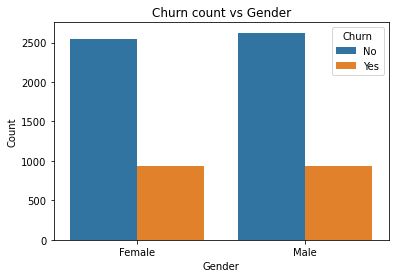

In [14]:
sns.countplot(x='gender',hue='Churn',data=df)
plt.title('Churn count vs Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Insight Drawn:
    Churn count is similar among men and women.

# #2).Female senior citizen in the dataset.

In [16]:
df1=df[df['gender']=='Female']
df2=df1[df1['SeniorCitizen']==1]
df2.count()

customerID          568
gender              568
SeniorCitizen       568
Partner             568
Dependents          568
tenure              568
PhoneService        568
MultipleLines       568
InternetService     568
OnlineSecurity      568
OnlineBackup        568
DeviceProtection    568
TechSupport         568
StreamingTV         568
StreamingMovies     568
Contract            568
PaperlessBilling    568
PaymentMethod       568
MonthlyCharges      568
TotalCharges        568
Churn               568
dtype: int64

Insight Drawn:
   There are 568 Female senior citizens in the dataset.

# #3).Compare Tenure with Total Charges.

In [17]:
df[df['TotalCharges']==' '].index #checking for null value indexes

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [18]:

df6=df.drop([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754])
df6['TotalCharges']=df6['TotalCharges'].astype(float)#Changing object data type of Total Charges to float.

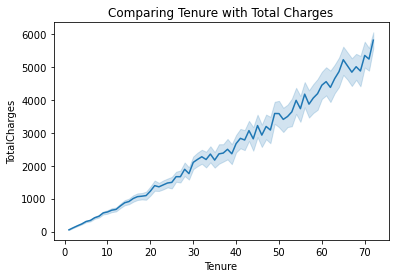

In [19]:
sns.lineplot(x='tenure',y='TotalCharges',data=df6)
plt.title('Comparing Tenure with Total Charges')
plt.xlabel('Tenure')
plt.show()

Insight Drawn:
   There is a linear relation between Tenure and Total Charges. Total Charges increases with Tenure. 

# #4).Contract preferred by Senior citizen.

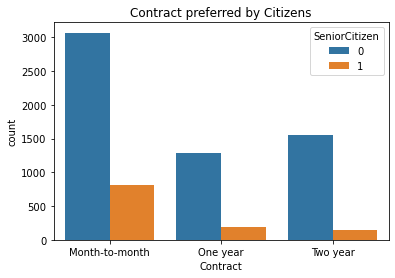

In [20]:
sns.countplot(x='Contract',hue='SeniorCitizen', data=df)
plt.title('Contract preferred by Citizens')
plt.show()

Insight Drawn:
   Most of the Senior Citizens prefer Month to month contract.

# #5).Comments on Payment methods.

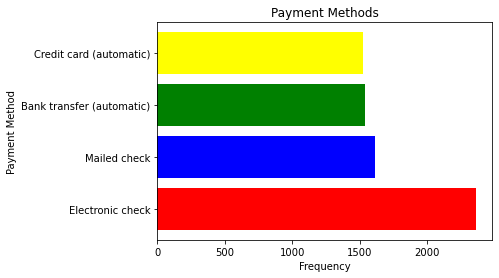

In [21]:
pymt= df['PaymentMethod'].value_counts().to_frame().reset_index()
plt.barh(pymt['index'],pymt['PaymentMethod'],color = ['red','blue','green','yellow'])
plt.title('Payment Methods')
plt.ylabel('Payment Method')
plt.xlabel('Frequency')
plt.show()

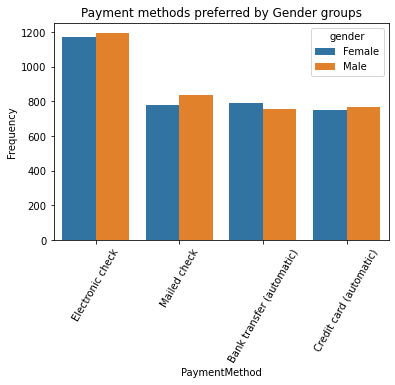

In [24]:
sns.countplot(x= 'PaymentMethod',hue='gender',data=df)
plt.xticks(rotation=60)
plt.title('Payment methods preferred by Gender groups')
plt.ylabel('Frequency')
plt.show()

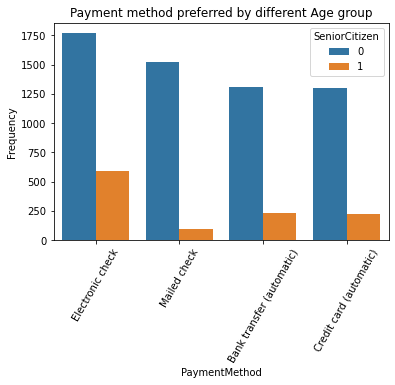

In [22]:
sns.countplot(x= 'PaymentMethod',hue='SeniorCitizen',data=df)
plt.xticks(rotation=60)
plt.title('Payment method preferred by different Age group')
plt.ylabel('Frequency')
plt.show()

Comments:

Electronic check is most popular among  both Senior and non senior citizens.


Automatic credit card is least preferred among 4 payment methods.



There is not much  gender variation in Payemnt methods preferred.

Mailed check which is second most popular among all the group is least preferred by Senior Citizens.